<a href="https://colab.research.google.com/github/Rohan-Patil-007/AICTE-Internship/blob/main/Smart_irrigation_Aicte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# Reading the DataSet

In [2]:
df = pd.read_csv('irrigation_machine.csv',index_col=0)

In [3]:
# Displaying first 5 rows
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [4]:
# displaying last 5 rows
df.tail()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0
1999,0.0,1.0,4.0,1.0,2.0,2.0,6.0,8.0,5.0,1.0,...,2.0,1.0,1.0,0.0,5.0,2.0,1.0,1,1,1


# Summary of the DataSet

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
 20  parcel_0   20

In [6]:
# Displaying only the columns for better understanding
df.columns

Index(['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'parcel_0',
       'parcel_1', 'parcel_2'],
      dtype='object')

In [7]:
# Displaying the Statistical Summary of the Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_0,2000.0,1.4370,1.321327,0.0,0.0,1.0,2.0,8.0
sensor_1,2000.0,1.6590,1.338512,0.0,1.0,1.0,2.0,9.0
sensor_2,2000.0,2.6545,1.699286,0.0,1.0,2.0,4.0,10.0
sensor_3,2000.0,2.6745,1.855875,0.0,1.0,2.0,4.0,11.0
sensor_4,2000.0,2.8875,1.816451,0.0,2.0,3.0,4.0,12.0
sensor_5,2000.0,1.4110,1.339394,0.0,0.0,1.0,2.0,7.0
sensor_6,2000.0,3.3155,2.206444,0.0,2.0,3.0,5.0,13.0
sensor_7,2000.0,4.2015,2.280241,0.0,3.0,4.0,6.0,12.0
sensor_8,2000.0,1.2140,1.386782,0.0,0.0,1.0,2.0,8.0
sensor_9,2000.0,1.9010,1.518668,0.0,1.0,2.0,3.0,9.0


In [8]:
# checking for null values if they are present
df.isnull().sum()

,0
sensor_0,0
sensor_1,0
sensor_2,0
sensor_3,0
sensor_4,0
sensor_5,0
sensor_6,0
sensor_7,0
sensor_8,0
sensor_9,0


# Define Feature and Labels

In [9]:
X = df.iloc[:,0:20]

In [10]:
y = df.iloc[:,20:]

In [11]:
X.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
1800,0.0,2.0,4.0,2.0,2.0,1.0,3.0,7.0,1.0,2.0,1.0,0.0,6.0,3.0,4.0,0.0,2.0,0.0,6.0,3.0
827,2.0,1.0,2.0,1.0,1.0,1.0,9.0,2.0,0.0,1.0,5.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0
1465,1.0,1.0,2.0,5.0,2.0,1.0,4.0,4.0,1.0,1.0,2.0,3.0,5.0,5.0,2.0,0.0,1.0,2.0,1.0,1.0
509,2.0,2.0,5.0,3.0,3.0,0.0,10.0,4.0,0.0,2.0,2.0,7.0,7.0,1.0,1.0,4.0,5.0,1.0,0.0,1.0
1213,1.0,3.0,5.0,0.0,2.0,0.0,1.0,2.0,3.0,4.0,3.0,3.0,0.0,2.0,3.0,1.0,1.0,2.0,2.0,4.0
1894,3.0,1.0,0.0,2.0,2.0,1.0,9.0,6.0,0.0,2.0,3.0,0.0,6.0,6.0,4.0,2.0,2.0,1.0,3.0,0.0
1757,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,5.0,2.0,6.0,4.0,2.0,2.0,5.0,0.0,0.0,3.0,2.0,2.0
283,3.0,2.0,3.0,0.0,2.0,0.0,6.0,5.0,0.0,0.0,3.0,1.0,3.0,0.0,3.0,2.0,1.0,6.0,0.0,1.0
668,4.0,4.0,5.0,0.0,4.0,4.0,3.0,2.0,1.0,2.0,3.0,2.0,0.0,1.0,3.0,2.0,5.0,2.0,0.0,1.0
1645,1.0,2.0,6.0,3.0,1.0,0.0,2.0,5.0,0.0,2.0,1.0,4.0,2.0,1.0,2.0,1.0,4.0,2.0,2.0,1.0


In [12]:
y.sample(10)

,parcel_0,parcel_1,parcel_2
809,1,0,0
901,0,1,0
403,1,1,0
1780,1,1,0
468,1,0,0
179,1,0,0
1791,1,1,0
917,1,1,1
26,1,1,0
686,1,1,0


In [13]:
# Giving the info of the Datatypes of the column present in X
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float64(20

In [14]:
# Giving the info of the Datatypes of the column present in y
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 62.5 KB


In [15]:
# displaying the Data
X

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


In [16]:
# displaying the Data
y

,parcel_0,parcel_1,parcel_2
0,0,1,0
1,0,0,0
2,1,1,0
3,0,0,0
4,1,1,0
...,...,...,...
1995,0,0,0
1996,1,1,1
1997,1,0,0
1998,0,1,0


In [17]:
# checking the rows and columns
X.shape,y.shape

((2000, 20), (2000, 3))

# Training and Splitting the Dat

In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]])

In [19]:
# training and splitting the data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [20]:
# Using MultiOutput and applying the Random forest classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

rainf = RandomForestClassifier(
    n_estimators=200,
    max_depth = 10,
    min_samples_split=4,
    min_samples_leaf = 2,
    random_state = 42
)

model = MultiOutputClassifier(rainf)
model.fit(X_train,y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=200,
                                                       random_state=42))

In [21]:
# displaying the report
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))

Classification Report:
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


# Data Visualization

In [23]:
import matplotlib.pyplot as plt

In [24]:
conditions = {
      "Parcel 0 ON": df['parcel_0'],
      "Parcel 1 ON": df['parcel_1'],
      "Parcel 2 ON": df['parcel_2'],
      "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
      "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
      "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
      "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}


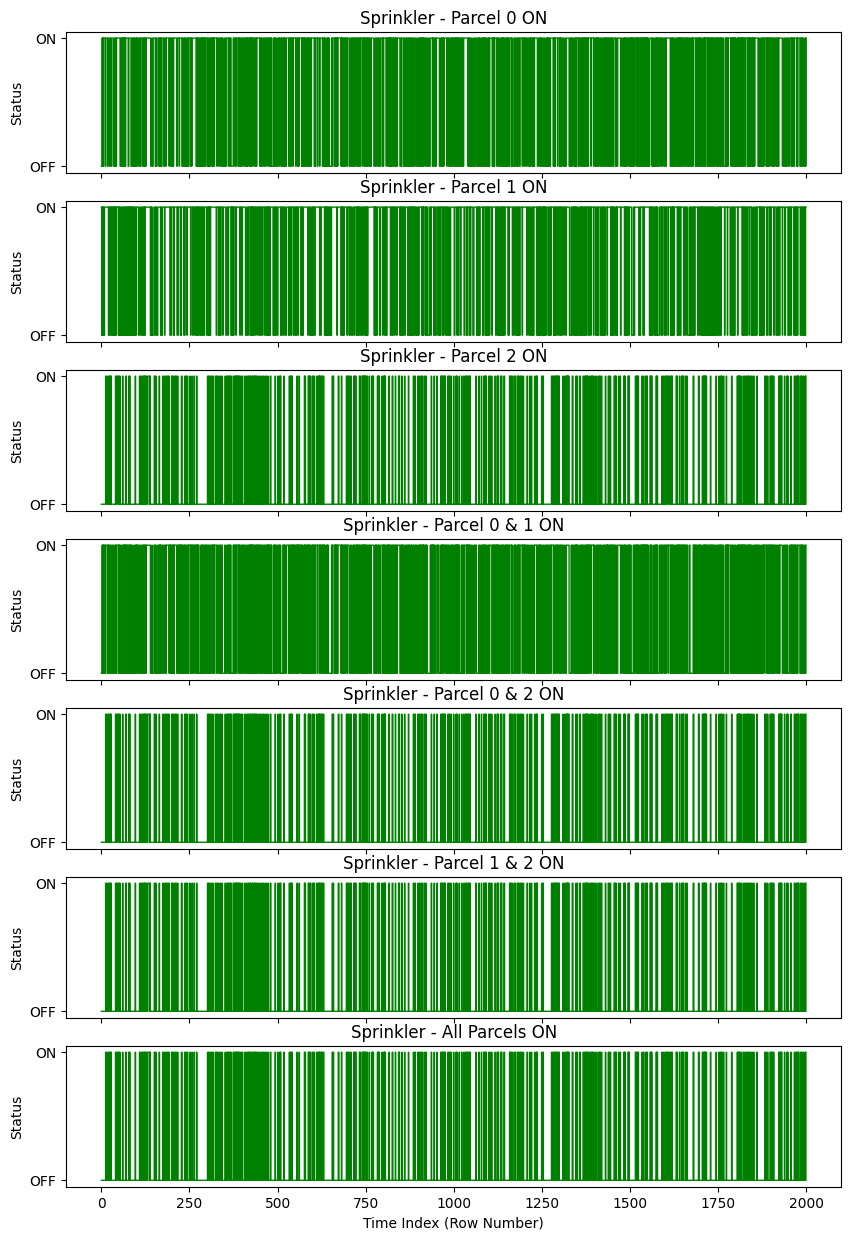

In [25]:
fig, axs = plt.subplots(nrows=len(conditions), figsize=(10,15), sharex=True)

# Loop through each condition to plot corresponding square wave
for ax, (title, condition) in zip(axs, conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='green')
    ax.set_title(f"Sprinkler - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])
# Label x-axis on the last subplot
axs[-1].set_xlabel("Time Index (Row Number)")

# Plot
plt.show()

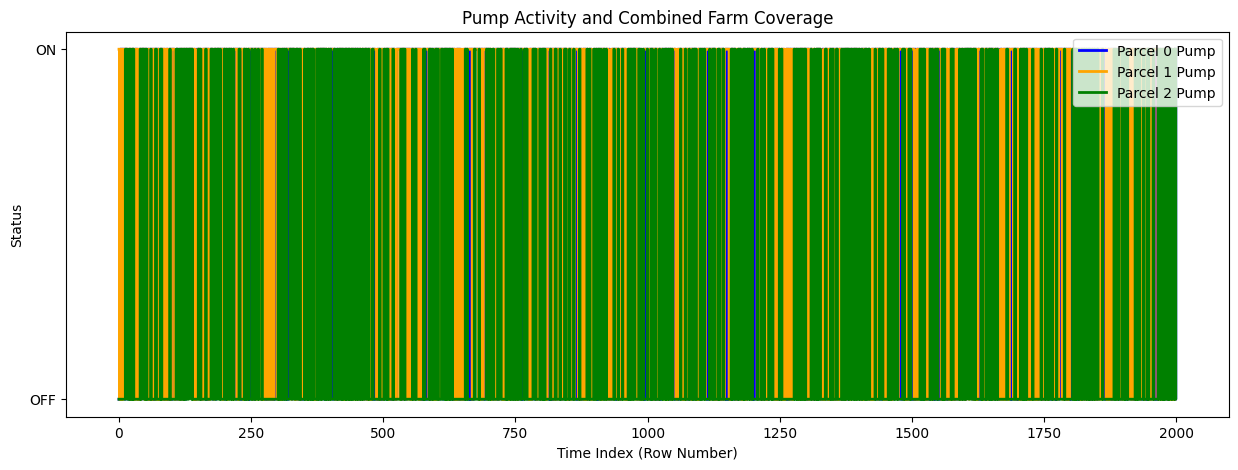

In [26]:
# Calculate combined activity of all pumps (overlap)
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(15, 5))

# Plot individual pump statuses
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='blue')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='orange')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='green')

plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()

# Saving the model

In [27]:
import joblib
from sklearn.pipeline import Pipeline

joblib.dump(model, "Farm_Irrigation_System.pkl")

['Farm_Irrigation_System.pkl']